In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [12]:
GDP1=pd.read_excel(r"C:\Users\iT HOME\PycharmProjects\GDP project file\GDP after dummies.xlsx")
GDP1.head()

,Unnamed: 0,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE,Country_id
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,1,0,0,0,0,0,0,0,1
2,2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,1,0,0,0,0,2
3,3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,1,0,0,3
4,4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,1,4


In [13]:
y = GDP1['GDP ($ per capita)']
X = GDP1.drop(['GDP ($ per capita)'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True)

In [7]:
polly1 = PolynomialFeatures(degree = 3)
xpolly=polly1.fit_transform(X_train)
las1 = Lasso(alpha=1)
las1.fit(xpolly,y_train)

Lasso(alpha=1)

In [14]:
polly1_pred = las1.predict(polly1.fit_transform(X_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=polly1_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,1966.651407
54,31100.000000,16834.803265
185,13300.000000,10308.986069
80,20000.000000,15051.328558
33,600.000000,2826.219506
201,7400.000000,4559.666243
37,1400.000000,11360.617279
218,4800.000000,7567.238605
199,1000.000000,2119.822342
66,22000.000000,17828.691375


In [33]:
print('polynomial regresssion Performance with lasso:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, polly1_pred))
print('MSE:', metrics.mean_squared_error(y_test, polly1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, polly1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, polly1_pred))

polynomial regresssion Performance with lasso:

all features, No scaling:
MAE: 6561.730853706647
MSE: 217317058.53531495
RMSE: 14741.677602475063
R2_Score:  -1.6620588667041463


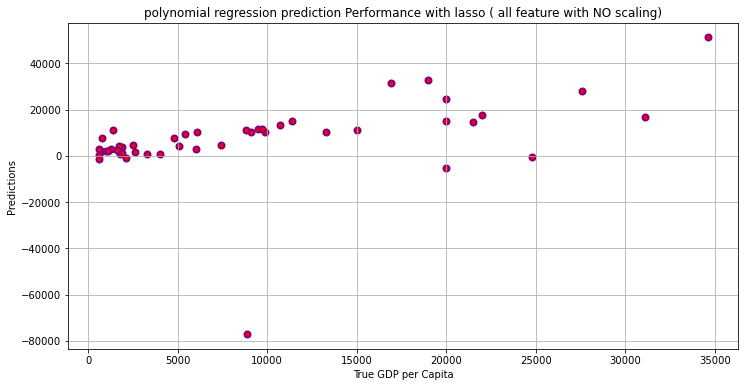

In [34]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,polly1_pred,color='red', linewidths=2, edgecolors='purple')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with lasso ( all feature with NO scaling)') 
plt.grid()
plt.show()

In [35]:
sc_X = StandardScaler()
X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

In [36]:
polly2 = PolynomialFeatures(degree = 3)
x2polly=polly2.fit_transform(X2_train)
las2 = Lasso(alpha=1)
las2.fit(x2polly,y2_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14072732.047290713, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [37]:
polly2_pred = las2.predict(polly2.fit_transform(X2_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=polly2_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,-296.823809
54,31100.000000,34792.071575
185,13300.000000,9015.105642
80,20000.000000,9213.052181
33,600.000000,1306.211326
201,7400.000000,4275.597522
37,1400.000000,-4284.757907
218,4800.000000,8743.405275
199,1000.000000,-3180.879471
66,22000.000000,10479.506958


In [40]:
print('polynomial regresssion Performance with lasso:')
print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, polly2_pred))
print('MSE:', metrics.mean_squared_error(y_test, polly2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, polly2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, polly2_pred))

polynomial regresssion Performance with lasso:

all features, with scaling:
MAE: 5704.676411425972
MSE: 87088013.06336418
RMSE: 9332.095855881687
R2_Score:  -0.06679806418096357


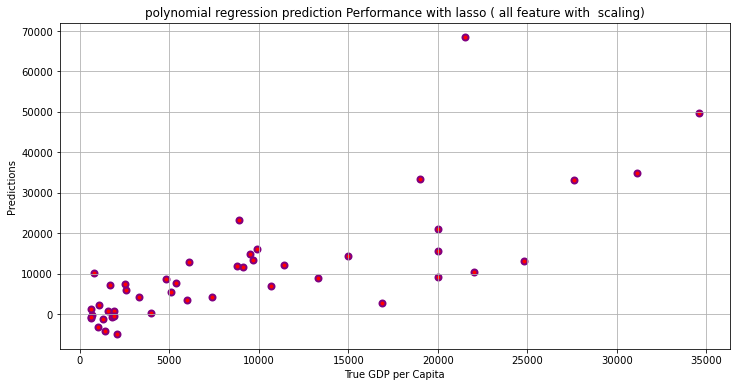

In [41]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y2_test,polly2_pred,color='red', linewidths=2, edgecolors='purple')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with lasso ( all feature with  scaling)') 
plt.grid()
plt.show()

In [42]:
y3 = y
X3 = GDP1.drop(['GDP ($ per capita)','Population', 'Area (sq. mi.)', 'Arable (%)',
                        'Climate', 'Deathrate'], axis=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101,shuffle=True)

In [43]:
polly3 = PolynomialFeatures(degree = 3)
x3polly=polly3.fit_transform(X3_train)
las3=Lasso(alpha=1)
las3.fit(x3polly,y3_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2690419.699450017, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [44]:
polly3_pred = las3.predict(polly3.fit_transform(X3_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=polly3_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,454.585518
54,31100.000000,26115.814552
185,13300.000000,13768.931243
80,20000.000000,6861.498414
33,600.000000,-118.500622
201,7400.000000,9128.730666
37,1400.000000,10312.051824
218,4800.000000,13195.987046
199,1000.000000,-3565.231164
66,22000.000000,9624.704351


In [47]:
print('polynomial regresssion Performance with lasso:')
print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, polly3_pred))
print('MSE:', metrics.mean_squared_error(y_test, polly3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, polly3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, polly3_pred))

polynomial regresssion Performance with lasso:

selected features, No scaling:
MAE: 5847.967718649765
MSE: 69218308.91268583
RMSE: 8319.754137754662
R2_Score:  0.1520996362587046


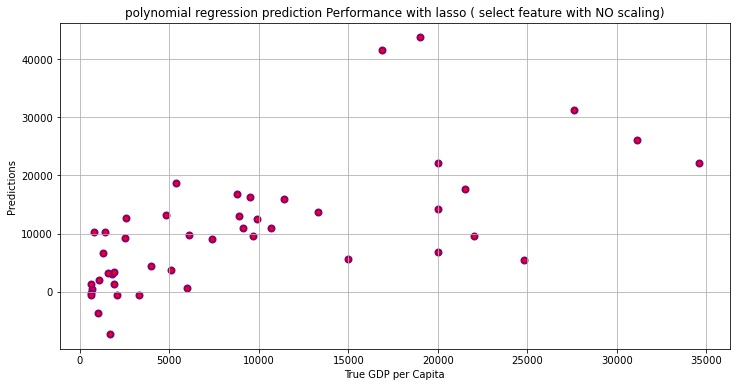

In [48]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,polly3_pred,color='red', linewidths=2, edgecolors='purple')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with lasso ( select feature with NO scaling)') 
plt.grid()
plt.show()

In [49]:
sc_X4 = StandardScaler()
X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

In [50]:
polly4 = PolynomialFeatures(degree = 3)
x4polly=polly4.fit_transform(X4_train)
las4 =Lasso(alpha=1)
las4.fit(x4polly,y4_train)

C:\Users\iT HOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19649089.410692, tolerance: 1895978.7845303863
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [51]:
polly4_pred = las4.predict(polly4.fit_transform(X4_test))
dfff = pd.DataFrame(data=y_test)
df9 = pd.DataFrame(data=polly4_pred)
df9.index = dfff.index

dff=pd.concat([dfff,df9],axis=1,ignore_index=False)
dff.columns=['Actual','Predicted']
dff

,Actual,Predicted
65,700.000000,2801.640487
54,31100.000000,37327.617191
185,13300.000000,9712.706006
80,20000.000000,-3811.334753
33,600.000000,6776.966182
201,7400.000000,2146.151848
37,1400.000000,3957.530174
218,4800.000000,8214.821367
199,1000.000000,1573.789724
66,22000.000000,17807.139271


In [53]:
print('polynomial regresssion Performance with lasso:')
print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, polly4_pred))
print('MSE:', metrics.mean_squared_error(y_test, polly4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, polly4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, polly4_pred))

polynomial regresssion Performance with lasso:

selected features, with scaling:
MAE: 8612.95875983441
MSE: 338631015.2457714
RMSE: 18401.929660928807
R2_Score:  -3.148112912772296


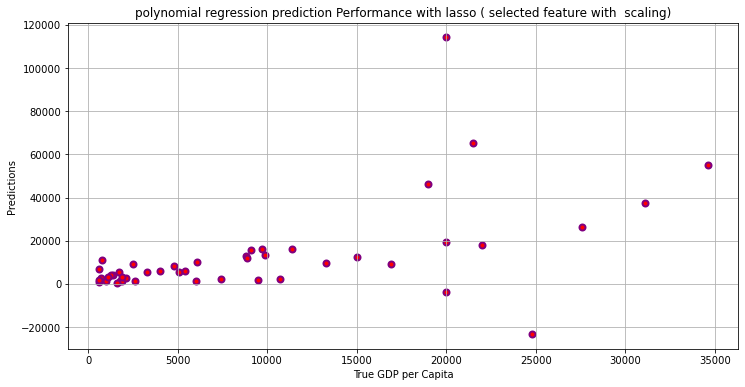

In [54]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,polly4_pred,color='red', linewidths=2, edgecolors='purple')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('polynomial regression prediction Performance with lasso ( selected feature with  scaling)') 
plt.grid()
plt.show()